In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#https://github.com/rfordatascience/tidytuesday/tree/master/data/2019/2019-05-14

nobel_winners = pd.read_csv("winner.csv")
nobel_winners_pubs = pd.read_csv("winner_pubs.csv")

In [4]:
nobel_winners = pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2019/2019-05-14/nobel_winners.csv")
nobel_winners_pubs = pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2019/2019-05-14/nobel_winner_all_pubs.csv", encoding = "ISO-8859-1")

# Keşifsel Veri Analizi

In [5]:
display(nobel_winners.info())
display(nobel_winners_pubs.info())

display(nobel_winners.isna().sum())
display(nobel_winners_pubs.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 969 entries, 0 to 968
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   prize_year            969 non-null    int64 
 1   category              969 non-null    object
 2   prize                 969 non-null    object
 3   motivation            881 non-null    object
 4   prize_share           969 non-null    object
 5   laureate_id           969 non-null    int64 
 6   laureate_type         969 non-null    object
 7   full_name             969 non-null    object
 8   birth_date            938 non-null    object
 9   birth_city            941 non-null    object
 10  birth_country         943 non-null    object
 11  gender                943 non-null    object
 12  organization_name     722 non-null    object
 13  organization_city     716 non-null    object
 14  organization_country  716 non-null    object
 15  death_date            617 non-null    ob

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93394 entries, 0 to 93393
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   laureate_id             93394 non-null  int64  
 1   laureate_name           93394 non-null  object 
 2   prize_year              93394 non-null  int64  
 3   title                   93391 non-null  object 
 4   pub_year                93393 non-null  float64
 5   paper_id                93361 non-null  float64
 6   doi                     93196 non-null  object 
 7   journal                 92164 non-null  object 
 8   affiliation             75880 non-null  object 
 9   is_prize_winning_paper  93394 non-null  object 
 10  category                93394 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 7.8+ MB


None

prize_year                0
category                  0
prize                     0
motivation               88
prize_share               0
laureate_id               0
laureate_type             0
full_name                 0
birth_date               31
birth_city               28
birth_country            26
gender                   26
organization_name       247
organization_city       253
organization_country    253
death_date              352
death_city              370
death_country           364
dtype: int64

laureate_id                   0
laureate_name                 0
prize_year                    0
title                         3
pub_year                      1
paper_id                     33
doi                         198
journal                    1230
affiliation               17514
is_prize_winning_paper        0
category                      0
dtype: int64

In [6]:
#Filtre
nobel_winner_dropped_columns = ["prize_share", "laureate_type",
                                "birth_date", "birth_city",
                                "organization_name", "organization_city", "organization_country",
                                "death_date", "death_city"]
nobel_winners.drop(nobel_winner_dropped_columns, axis=1, inplace=True)

nobel_winners_pubs_dropped_columns = ["laureate_name", "title",
                                "pub_year", "paper_id",
                                "doi", "journal", "affiliation"]
nobel_winners_pubs.drop(nobel_winners_pubs_dropped_columns, axis=1, inplace=True)

In [7]:
nobel_winners.drop_duplicates(inplace=True)

display(nobel_winners.info())
display(nobel_winners.isna().sum())
print("-" * 100)
display(nobel_winners_pubs.info())
display(nobel_winners_pubs.isna().sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 911 entries, 0 to 968
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   prize_year     911 non-null    int64 
 1   category       911 non-null    object
 2   prize          911 non-null    object
 3   motivation     823 non-null    object
 4   laureate_id    911 non-null    int64 
 5   full_name      911 non-null    object
 6   birth_country  885 non-null    object
 7   gender         885 non-null    object
 8   death_country  582 non-null    object
dtypes: int64(2), object(7)
memory usage: 71.2+ KB


None

prize_year         0
category           0
prize              0
motivation        88
laureate_id        0
full_name          0
birth_country     26
gender            26
death_country    329
dtype: int64

----------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93394 entries, 0 to 93393
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   laureate_id             93394 non-null  int64 
 1   prize_year              93394 non-null  int64 
 2   is_prize_winning_paper  93394 non-null  object
 3   category                93394 non-null  object
dtypes: int64(2), object(2)
memory usage: 2.9+ MB


None

laureate_id               0
prize_year                0
is_prize_winning_paper    0
category                  0
dtype: int64

,prize_year,laureate_id,category,is_prize_winning_paper
0,1902,10193,physics,5
1,1905,10192,physics,4
2,1906,10191,physics,3
3,1907,10190,physics,64
4,1908,20163,chemistry,2
...,...,...,...,...
540,2016,10003,physics,88
541,2016,20001,chemistry,1205
542,2016,20002,chemistry,322
543,2016,20003,chemistry,381


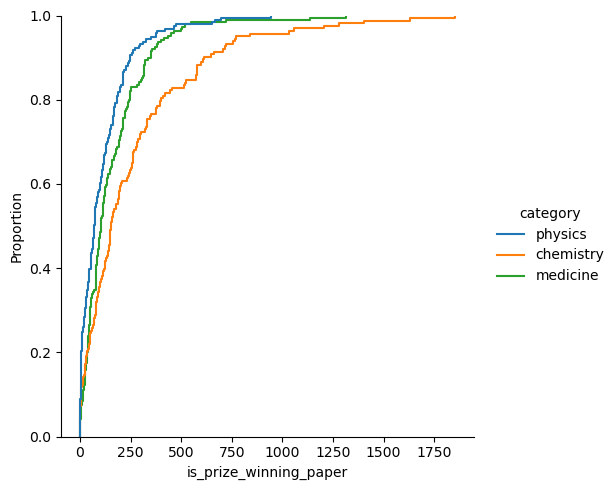

In [8]:
#Üç fen alanının herhangi birinde nobel alan insanların yazdığı makale sayılarının dağılımı
df_groupby = nobel_winners_pubs.groupby(["prize_year", "laureate_id", "category"])["is_prize_winning_paper"].agg(len).reset_index()
display(df_groupby)
ax = sns.displot(data=df_groupby, x="is_prize_winning_paper", kind="ecdf", hue="category")

Text(0, 0.5, 'Nobel Alan Biliminsanının Öldüğü Ülke')

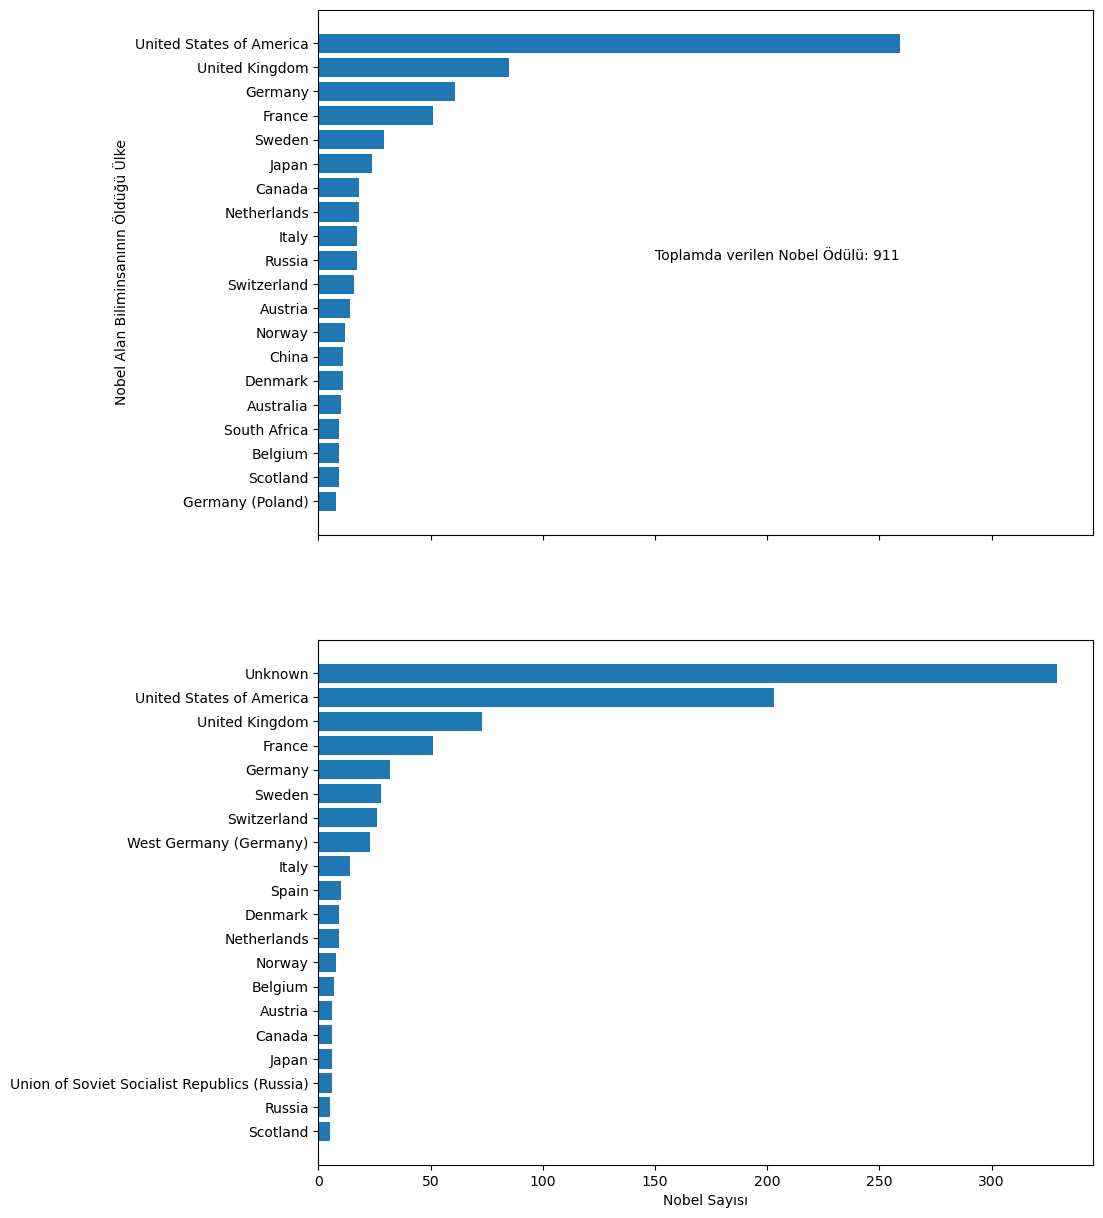

In [9]:
#Veri tablosunu nobel alan insanların öldüğü veya doğduğu ülkeye göre gruplama
nobel_wins_by_birth = nobel_winners.groupby("birth_country")["laureate_id"].agg([len]).reset_index()

nobel_winners["death_country"] = nobel_winners["death_country"].fillna("Unknown")
nobel_wins_by_death = nobel_winners.groupby("death_country")["laureate_id"].agg([len]).reset_index()

#En yüksek sayıda nobel alan ülkeler (doğum veya ölüm lokasyonuna göre)
nobel_wins_by_birth = nobel_wins_by_birth.nlargest(columns=["len"], n=20, keep="all").sort_values(by="len")
nobel_wins_by_death= nobel_wins_by_death.nlargest(columns=["len"], n=20, keep="all").sort_values(by="len")

#Grafik çizdirme
fig, ax = plt.subplots(nrows=2, sharex=True)
fig.set_size_inches(10, 15)
ax[0].barh(y=nobel_wins_by_birth.birth_country.values, width=nobel_wins_by_birth.len.values)
ax[0].annotate("Toplamda verilen Nobel Ödülü: {0}".format(nobel_winners.shape[0]), (150, 10))
ax[0].set_ylabel("Nobel Alan Biliminsanının Doğduğu Ülke")

ax[1].barh(y=nobel_wins_by_death.death_country.values, width=nobel_wins_by_death.len.values)
ax[1].set_xlabel("Nobel Sayısı")
ax[0].set_ylabel("Nobel Alan Biliminsanının Öldüğü Ülke")


(113, 7)

(50, 7)

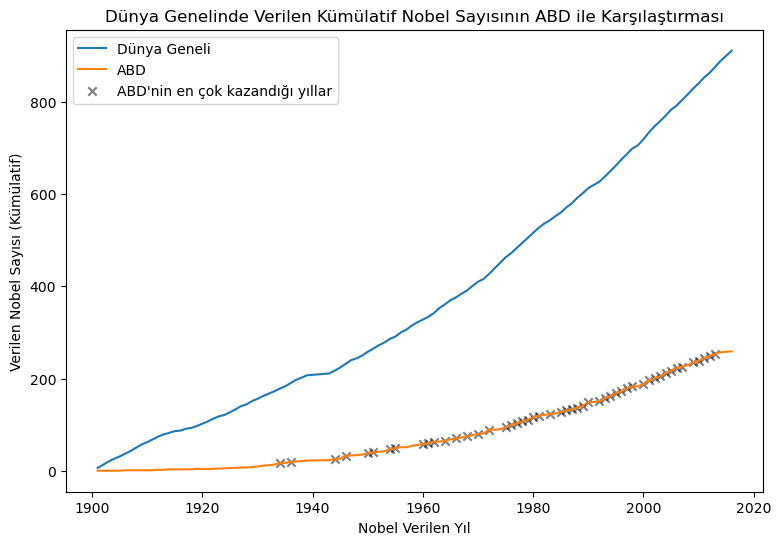

In [10]:
#Özel gruplama fonksiyonları
USA_filter = lambda x: len(x[x=="United States of America"]) #Amerikanın aldığı ödül sayısı
most_winning_country_filter= lambda x: x.value_counts().sort_values(ascending=False).index[0] #En çok ödül alan ülkenin ismi
is_equality= lambda x: False if len(x.value_counts()) < 2 else x.value_counts().sort_values(ascending=False)[0] == x.value_counts().sort_values(ascending=False)[1] #Birden fazla en çok ödül sayısına ulaşan ülke kontrolü

#Özel fonksiyonlar yardımı ili grup oluşumu
winners_by_year = nobel_winners.groupby("prize_year")["birth_country"].agg([len, USA_filter, most_winning_country_filter, is_equality, list]).reset_index()
winners_by_year.rename({"len": "total_nobel_prize", "<lambda_0>": "USA_nobel_prize", "<lambda_1>": "most_nobel_prize", "<lambda_2>": "is_equality"}, axis=1, inplace=True)
winners_by_year["USA_cumsum"] = winners_by_year.USA_nobel_prize.values.cumsum()

#Amerikanın tek başına en çok ödül aldığı yılların filtrelenmesi
USA_most_wins = winners_by_year[(winners_by_year["most_nobel_prize"] == "United States of America") & (winners_by_year["total_nobel_prize"] != 1) & (winners_by_year["is_equality"] == False)]

#Grafik çizimi
display(winners_by_year.shape)
display(USA_most_wins.shape)

fig, ax = plt.subplots()
ax.plot(winners_by_year.prize_year.values, winners_by_year.total_nobel_prize.values.cumsum(), label="Dünya Geneli")
ax.plot(winners_by_year.prize_year.values, winners_by_year.USA_cumsum.values, label="ABD")
ax.scatter(USA_most_wins.prize_year.values, USA_most_wins.USA_cumsum.values, label="ABD'nin en çok kazandığı yıllar", marker="x", color="black", alpha=0.5)
ax.set_title("Dünya Genelinde Verilen Kümülatif Nobel Sayısının ABD ile Karşılaştırması")
ax.set_ylabel("Verilen Nobel Sayısı (Kümülatif)")
ax.set_xlabel("Nobel Verilen Yıl")
ax.legend()
fig.set_size_inches(9, 6)

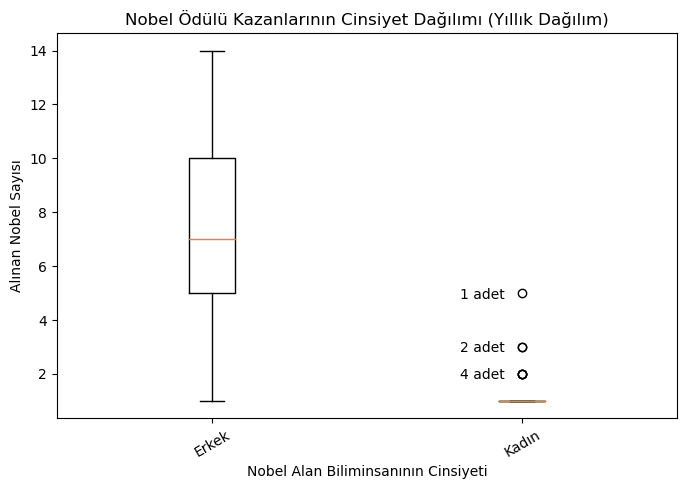

In [11]:
#Her sene verilen ödüllerin cinsiyete göre gruplandırılması
winner_by_gender_year = nobel_winners.groupby(["prize_year", "gender"])["laureate_id"].agg(len).reset_index()
winner_by_gender_year.rename({"laureate_id": "number_of_prize"}, axis=1, inplace=True)

male_winner = winner_by_gender_year[winner_by_gender_year["gender"] == "Male"]
female_winner = winner_by_gender_year[winner_by_gender_year["gender"] == "Female"]

#Grafik çizimi
fig, ax = plt.subplots()
plot_category = ["Male", "Female"]

for position, filter in enumerate(plot_category):
    returned_ax = ax.boxplot(winner_by_gender_year[winner_by_gender_year["gender"] == filter].number_of_prize.values, positions=[position])

    flier = returned_ax["fliers"][0].get_data()
    flier_x = set(flier[0])
    flier_y = set(flier[1])

    for category in flier_x:
        for outlier in flier_y:
            ax.annotate("{:d} adet".format((flier[1] == outlier).sum()), xy=(category-0.2, outlier-0.2))

plot_category = ["Erkek", "Kadın"]            
ax.set_xticks(ticks=range(len(plot_category)), labels=plot_category)
ax.tick_params(axis="x", rotation=30)
ax.set_title("Nobel Ödülü Kazanlarının Cinsiyet Dağılımı (Yıllık Dağılım)")
ax.set_ylabel("Alınan Nobel Sayısı")
ax.set_xlabel("Nobel Alan Biliminsanının Cinsiyeti")
            
fig.set_size_inches(8, 5)

,category,number_of_prize
5,İktisat,78
1,Edebiyat,113
0,Barış,130
3,Kimya,175
2,Fizik,204
4,Tıp,211


number_of_prize,1,2,3
category,,,
Tıp,39,32,36
Fizik,47,32,31
Kimya,63,23,22
Barış,66,29,2
Edebiyat,105,4,0
İktisat,24,18,6


Text(0.5, 0.98, 'Verilen Nobel Ödüllerinin Kategorik Dağılımı')

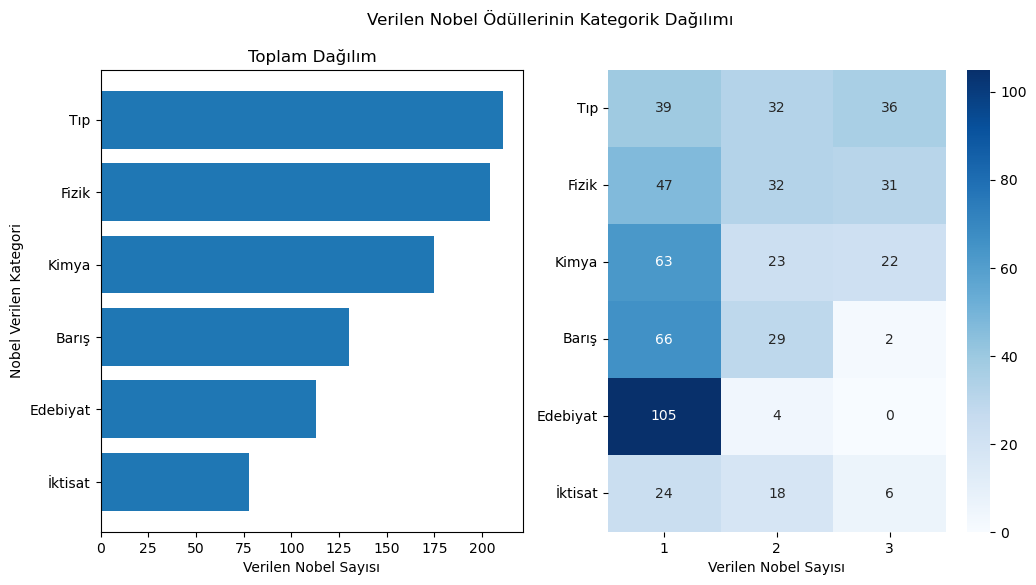

In [12]:
#Verilen ödüllerin kategorilere göre gruplandırılması
nobel_winners["category"] = nobel_winners["category"].replace({"Chemistry": "Kimya", "Literature": "Edebiyat", "Medicine": "Tıp", "Peace": "Barış", "Physics": "Fizik", "Economics": "İktisat"})
winners_by_cat = nobel_winners.groupby("category")["laureate_id"].agg(len).reset_index().sort_values(by="laureate_id")
winners_by_cat.rename({"laureate_id": "number_of_prize"}, axis=1, inplace=True)

#Her yıl verilen ödüllerin kategorilerine ve ödül alan kişi sayısına göre gruplandırılması ve frekans tablosuna dönüştürülmesi
winners_by_cat_yearly = nobel_winners.groupby(["prize_year", "category"])["laureate_id"].agg(len).reset_index()
winners_by_cat_yearly.rename({"laureate_id": "number_of_prize"}, axis=1, inplace=True)

cross_tab = pd.crosstab(index=winners_by_cat_yearly["number_of_prize"], columns=winners_by_cat_yearly["category"]).transpose()
cross_tab = cross_tab.reindex(winners_by_cat.category.values[::-1])

display(winners_by_cat)
display(cross_tab)

#Grafik çizimi
fig, ax = plt.subplots(ncols=2, nrows=1, sharex=False, sharey=False)
fig.set_size_inches(12, 6)

ax[0].barh(y=winners_by_cat.category.values, width=winners_by_cat.number_of_prize.values)
ax_heatmap = sns.heatmap(cross_tab, cbar=True, annot=True, fmt="d", cmap="Blues", ax=ax[1])
ax_heatmap.set_xlabel("Verilen Nobel Sayısı")
ax_heatmap.set_ylabel("")
ax_heatmap.tick_params("y", rotation=0)

ax[0].set_title("Toplam Dağılım")
ax[0].set_xlabel("Verilen Nobel Sayısı")
ax[0].set_ylabel("Nobel Verilen Kategori")
ax[0].set_yticks(ticks=range(len(winners_by_cat.category.values)) ,labels=winners_by_cat.category.values)

fig.suptitle("Verilen Nobel Ödüllerinin Kategorik Dağılımı")

,category,birth_country,laureate_id
42,Fizik,United States of America,66
41,Fizik,United Kingdom,22
12,Fizik,Germany,16
22,Fizik,Japan,11
25,Fizik,Netherlands,9
...,...,...,...
123,Tıp,Romania,1
124,Tıp,Russia,1
125,Tıp,Russian Empire (Finland),1
134,Tıp,Venezuela,1


,category,birth_country,laureate_id
0,Fizik,United States of America,66
1,Fizik,United Kingdom,22
2,Fizik,Germany,16
3,Kimya,United States of America,52
4,Kimya,United Kingdom,22
5,Kimya,Germany,19
6,Tıp,United States of America,70
7,Tıp,United Kingdom,23
8,Tıp,Germany,16


61

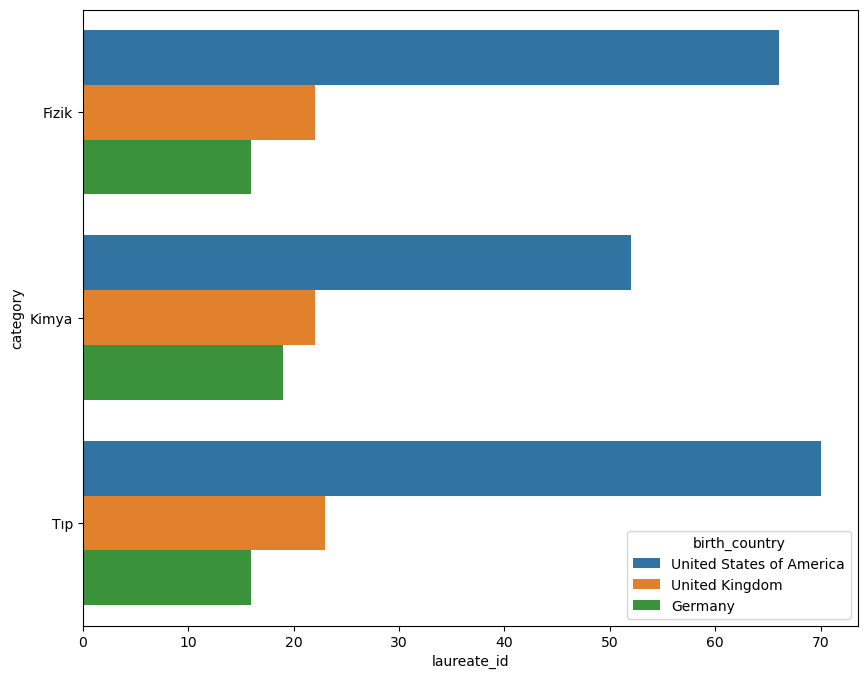

In [13]:
nobel_winners_cat_country = nobel_winners[nobel_winners["category"].isin(["Kimya", "Tıp", "Fizik"])].groupby(["category", "birth_country"])["laureate_id"].agg(len).reset_index().sort_values(by=["category", "laureate_id"], ascending=[True, False])
display(nobel_winners_cat_country)
nobel_winners_cat_country = nobel_winners_cat_country.groupby("category").apply(lambda x: x.nlargest(3, columns=["laureate_id"])).reset_index(drop=True)
display(nobel_winners_cat_country)
ax = sns.barplot(data=nobel_winners_cat_country, y="category", x="laureate_id", hue="birth_country")
ax.get_figure().set_size_inches(10,8)
display(nobel_winners[nobel_winners["birth_country"] == "Germany"]["category"].value_counts().sum())

# ABD'nin Nobel Ödüllerindeki Üstünlüğü

## Nobel Alan Kişilerin Yazdığı Makale Sayıları Nasıl Dağılmaktadır?

Nobel ödülleri dünya çapında bilinirliğe sahip olan ve prestiji oldukça yüksek bir ödüldür. Nobel, her sene belli bir branştaki en etkileyici/faydalı çalışmaya verilmekte olup zaman zaman da aynı konuyu paralel çalışan birden fazla kişiye verilmektedir. İlk Nobel ödülü 1901 yılında verilmiş olup 6 farklı kategori bulunmaktadır. Nobel ödülü alan bilim insanları alanlarının en iyisi olarak tanınmak ile beraber ilgili alanda çok fazla katkı sağlamış kişilerdir. __Şekil-1__'de ise Nobel verilen üç fen alanında (Kimya, Fizik, Tıp) Nobel verilen bilim insanlarının kendi alanlarında yazdıkları yayın sayısının kümülatif dağılımı gösterilmektedir.

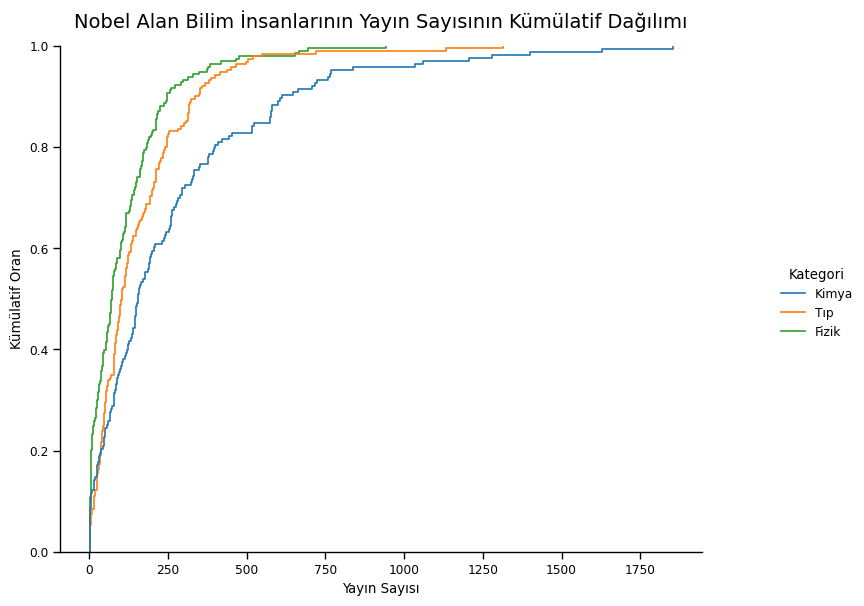

In [19]:
#Üç fen alanının herhangi birinde nobel alan insanların yazdığı makale sayılarının dağılımı
df_groupby = nobel_winners_pubs.groupby(["prize_year", "laureate_id", "category"])["is_prize_winning_paper"].agg(len).reset_index().sort_values(by=["category","is_prize_winning_paper"])
df_groupby.replace({"physics": "Fizik", "chemistry": "Kimya", "medicine": "Tıp"}, inplace=True)
df_groupby.rename({"category": "Kategori"}, axis=1, inplace=True)
ax = sns.displot(data=df_groupby, x="is_prize_winning_paper", kind="ecdf", hue="Kategori")
ax.ax.set_ylabel("Kümülatif Oran")
ax.ax.set_xlabel("Yayın Sayısı")
sns.set_context("paper")

#ax.ax.hlines(0.8, xmin=0, xmax=1500)
#ax.ax.vlines(400, ymin=0, ymax=1)
ax.ax.set_title("Nobel Alan Bilim İnsanlarının Yayın Sayısının Kümülatif Dağılımı", y=1.02, fontsize=14)
ax.ax.get_figure().set_size_inches(9, 6)
sns.set_context("paper")
ax.ax.get_figure().savefig("Nobel Alan Bilim İnsanlarının Yayın Sayısının Kümülatif Dağılımı", bbox_inches='tight')

__Şekil-1__'de gösterilen grafik incelendiği zaman Kimya alanında Nobel alan bilim insanlarının yüksek miktarda yayın sayısına sahip olduğu görülmektedir. Kimya alanında Nobel verilen bilim insanlarının yaklaşık %20'sinin en az 400 adet gibi ciddi bir sayıda yayına sahip olduğu düşünüldüğünde Kimya alanındaki Nobel ödülüne layık görülen insanların oldukça üretken olduğu değerlendirilebilir.

Kimya alanında Nobel ödülü verilen bilim insanlarının bu kadar çok yayın sayısına sahip olması Kimya dalının en çok Nobel ödülü verilen alan olmasının bir ön göstergesi olabilir. Bunun için de her kategorinin ne kadar Nobel ödülüne sahip olduğunu inceleyebiliriz.

## En Çok Kimya Alanında Mı Nobel Ödülü Verilmiştir?

__Şekil-2__'de her Nobel kategorisinde ne kadar ödül verildiği bir çubuk grafiği aracılığı ile gösterilmektedir.

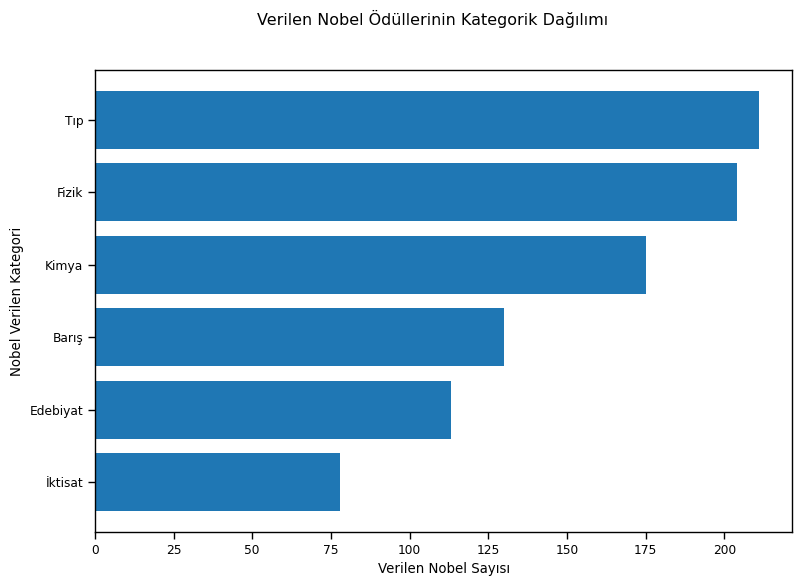

In [291]:
#Verilen ödüllerin kategorilere göre gruplandırılması
nobel_winners["category"] = nobel_winners["category"].replace({"Chemistry": "Kimya", "Literature": "Edebiyat", "Medicine": "Tıp", "Peace": "Barış", "Physics": "Fizik", "Economics": "İktisat"})
winners_by_cat = nobel_winners.groupby("category")["laureate_id"].agg(len).reset_index().sort_values(by="laureate_id")
winners_by_cat.rename({"laureate_id": "number_of_prize"}, axis=1, inplace=True)

#display(winners_by_cat)
#display(cross_tab)

#Grafik çizimi
fig, ax = plt.subplots()

ax.barh(y=winners_by_cat.category.values, width=winners_by_cat.number_of_prize.values)


ax.set_xlabel("Verilen Nobel Sayısı")
ax.set_ylabel("Nobel Verilen Kategori")
ax.set_yticks(ticks=range(len(winners_by_cat.category.values)) ,labels=winners_by_cat.category.values)

fig.suptitle("Verilen Nobel Ödüllerinin Kategorik Dağılımı")
fig.set_size_inches(9, 6)
fig.savefig("Verilen Nobel Ödüllerinin Kategorik Dağılımı", bbox_inches='tight')

__Şekil-1__'de edinilen bulgular doğrultusunda en çok ödül alan kategorinin Kimya alanı olması beklenmekteydi, ancak Kimya alanının fen bilimleri arasında en düşük sayıda Nobel ödülüne sahip olduğu __Şekil-2__'de gösterilmektedir. __Şekil-2__'den elde edilen bir diğer bulgu ise Nobel ödüllerinin dağılımı arasında fen bilimleri ve diğer alanlar arasında bir kırılım gerçekleştiğidir. Bu durumun, fen alanlarında diğer alanlara kıyasla daha fazla bilimsel çalışma yapılıyor olması ve fen alanlarının genelde daha çok maddi destek buluyor olmasından kaynaklandığı değerlendirilebilir. 

Nobel ödüllerinin fen alanlarına daha çok verilmesi aynı zamanda ülkelerin teknolojik alanlarda olan ilerlemesinin de bir göstergesi olabilir. Bu arguman fen alanlarında en çok ödüle sahip ülkelerin kıyaslanmasıyla incelenebilir.

## Fen Alanlarında En Çok Nobel Alan Ülkeler

__Şekil-3__'te her fen alanında en çok ödül almış 3 ülkenin ilgili alanda aldığı nobel sayısı çubuk grafiği ile gösterilmiştir.

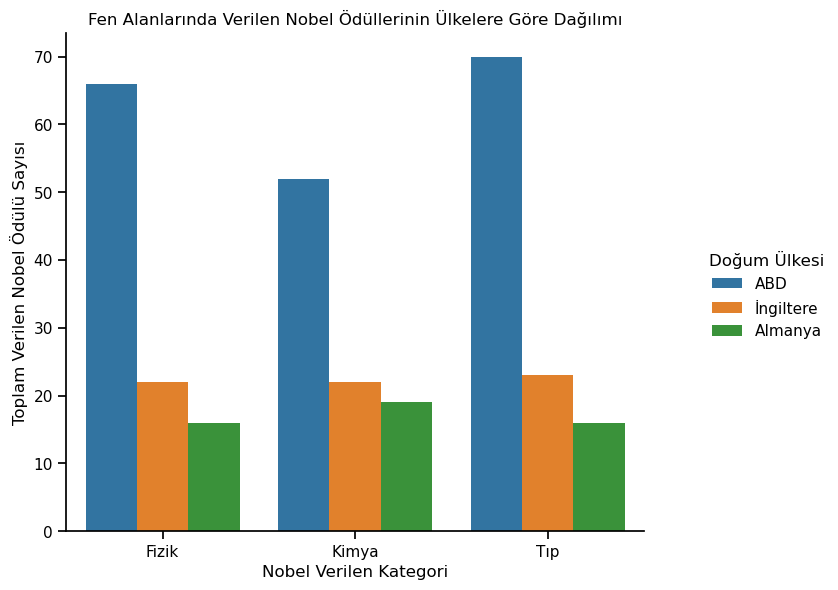

In [27]:
nobel_winners_cat_country = nobel_winners[nobel_winners["category"].isin(["Kimya", "Tıp", "Fizik"])].groupby(["category", "birth_country"])["laureate_id"].agg(len).reset_index().sort_values(by=["category", "laureate_id"], ascending=[True, False])
nobel_winners_cat_country = nobel_winners_cat_country.groupby("category").apply(lambda x: x.nlargest(3, columns=["laureate_id"])).reset_index(drop=True)
nobel_winners_cat_country.rename({"birth_country": "Doğum Ülkesi"}, axis=1, inplace=True)
nobel_winners_cat_country.replace({"United States of America": "ABD", "United Kingdom": "İngiltere", "Germany": "Almanya", "Japan": "Japonya", "France": "Fransa"}, inplace=True)

ax = sns.catplot(data=nobel_winners_cat_country, x="category", y="laureate_id", hue="Doğum Ülkesi", kind="bar")
ax.ax.set_ylabel("Toplam Verilen Nobel Ödülü Sayısı")
ax.ax.set_xlabel("Nobel Verilen Kategori")
ax.ax.set_title("Fen Alanlarında Verilen Nobel Ödüllerinin Ülkelere Göre Dağılımı")
sns.set_context("paper")
ax.ax.get_figure().set_size_inches(9, 6)
ax.ax.get_figure().savefig("Fen Alanlarında Verilen Nobel Ödüllerinin Ülkelere Göre Dağılımı", bbox_inches='tight')

__Şekil-3__'e bakıldığı zaman Nobel ödülü verilen fen alanlarında en çok ödül alan ilk 3 ülkenin de bilim ve teknoloji alanında ismi sıklıkla duyulan ve köklü üniversitelere sahip ülkeler olduğu görülebilmektedir. Bu durum, __Şekil-2__'den yola çıkarak öne sürülen ve teknolojik ilerlemenin alınan Nobel ödülü sayısı ile ilişkili olabileceğini desteklemektedir.

Öte yandan __Şekil-3__'te gözlemlenen bir diğer sıradışı durum ise bütün fen alanlarında en çok Nobel alan ülkenin açık bir fark ile ABD olmasıdır. ABD, uzun bir süredir bilim ve teknoloji alanında öncü bir ülke olarak bilinmektedir. Ancak bu durumun, Nobel verilmeye başlandığından bu yana geçerli olup olmadığı bu görsel ile açıklanamamaktadır. Dolayısıyla yıllar içerisinde verilen Nobel ödüllerinin kaçının ABD'ye verildiği ayrıca incelenmelidir.

## ABD Her Zaman En Çok Nobel Alan Ülke Miydi?

__Şekil-4__'te Dünya genelinde verilen Nobel ödüllerinin kümülatif toplamı ile ABD'ye verilen Nobel ödüllerinin kümülatif toplamı gösterilmiştir. Aynı zamanda ABD'nin ilgili yılda en çok ödül alan ülke olup olmadığı da __Şekil-4__ üzerinde gösterilmiştir (birden fazla ülkenin eşit sayıda ödül aldığı yıllar hariç).

(113, 7)

(50, 7)

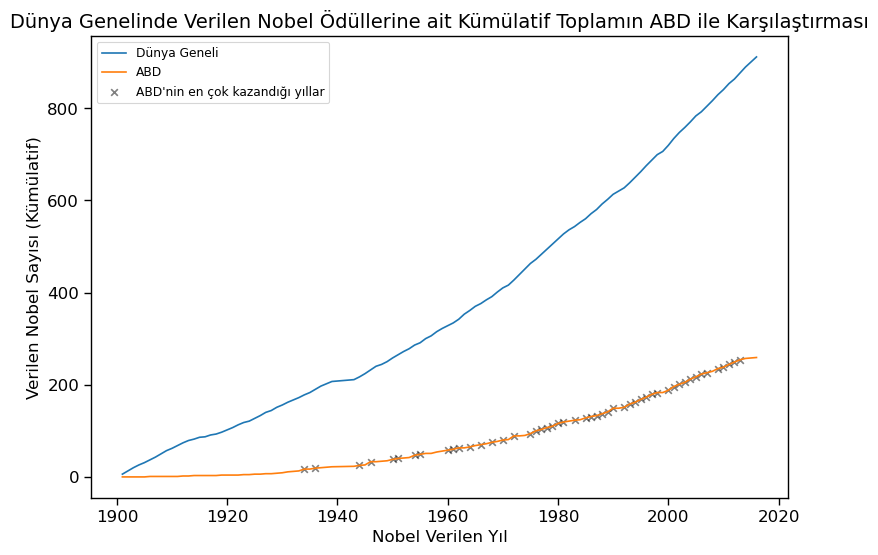

In [31]:
#Özel gruplama fonksiyonları
USA_filter = lambda x: len(x[x=="United States of America"]) #Amerikanın aldığı ödül sayısı
most_winning_country_filter= lambda x: x.value_counts().sort_values(ascending=False).index[0] #En çok ödül alan ülkenin ismi
is_equality= lambda x: False if len(x.value_counts()) < 2 else x.value_counts().sort_values(ascending=False)[0] == x.value_counts().sort_values(ascending=False)[1] #Birden fazla en çok ödül sayısına ulaşan ülke kontrolü

#Özel fonksiyonlar yardımı ili grup oluşumu
winners_by_year = nobel_winners.groupby("prize_year")["birth_country"].agg([len, USA_filter, most_winning_country_filter, is_equality, list]).reset_index()
winners_by_year.rename({"len": "total_nobel_prize", "<lambda_0>": "USA_nobel_prize", "<lambda_1>": "most_nobel_prize", "<lambda_2>": "is_equality"}, axis=1, inplace=True)
winners_by_year["USA_cumsum"] = winners_by_year.USA_nobel_prize.values.cumsum()

#Amerikanın tek başına en çok ödül aldığı yılların filtrelenmesi
USA_most_wins = winners_by_year[(winners_by_year["most_nobel_prize"] == "United States of America") & (winners_by_year["total_nobel_prize"] != 1) & (winners_by_year["is_equality"] == False)]

#Grafik çizimi
display(winners_by_year.shape)
display(USA_most_wins.shape)

fig, ax = plt.subplots()
ax.plot(winners_by_year.prize_year.values, winners_by_year.total_nobel_prize.values.cumsum(), label="Dünya Geneli")
ax.plot(winners_by_year.prize_year.values, winners_by_year.USA_cumsum.values, label="ABD")
ax.scatter(USA_most_wins.prize_year.values, USA_most_wins.USA_cumsum.values, label="ABD'nin en çok kazandığı yıllar", marker="x", color="black", alpha=0.5)
ax.set_title("Dünya Genelinde Verilen Nobel Ödüllerine ait Kümülatif Toplamın ABD ile Karşılaştırması", fontsize=14)
ax.set_ylabel("Verilen Nobel Sayısı (Kümülatif)", fontsize=12)
ax.set_xlabel("Nobel Verilen Yıl", fontsize=12)
ax.tick_params("both", labelsize=12)
ax.legend()

fig.set_size_inches(9, 6)
fig.savefig("Dünya Genelinde Verilen Nobel Ödüllerine ait Kümülatif Toplamın ABD ile Karşılaştırması", bbox_inches='tight')

__Şekil-4__’te yer alan kümülatif toplam grafiği incelendiğinde ABD’nin neredeyse çoğu zaman bir yıl içerisinde en çok Nobel ödülünü alan ülke ünvanını koruduğu görülmektedir. 2016 yılı itibari ile 113 yıldır verilmekte olan Nobel ödüllerinde ABD 50 kere en çok nobel alan ülke olmuştur. Ayrıca toplam verilen ödüllerin yaklaşık %20'nin de ABD'ye ait olduğu görülmektedir.

__Şekil-4__’te yer alan kümülatif toplam grafiği incelendiğinde elde edilen bir diğer çıktı ise ABD’nin baskın olduğu dönemlerin 1940-1960 yılları arasında başlıyor olmasıdır. Bu dönemlerde yaşanmış iki büyük olay olan ve teknolojik rekabeti oldukça arttıran İkinci Dünya Savaşı ve Soğuk Savaş ABD’nin bilim yarışına güçlü bir giriş yapmasına sebep olmuş olabilir. Bu dönemlerde gerçekleşen Rusya ve ABD arasındaki uzay yarışı da bu bulguya bir kanıt olarak değerlendirilebilir.